# Voyageur du commerce

## Objectif

L'objectif est de rejoindre un grand nombre de villes en parcourant le plus court chemin.

## Imports

In [1]:
import math
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (12, 9)
import random as rand

## Classes pour représenter le parcours du voyageur de commerce

In [2]:
class Position():
    
    def __init__(self, scale):
        self.x = scale * rand.random()
        self.y = scale * rand.random()

class Parcours():
    
    def __init__(self, positions):
        self.positions = positions
    
    def generate(self, n, scale):
        
        self.positions = [] 
        i = 0
        
        while i < n:
            self.positions.append(Position(scale))
            i += 1
    
    def xs(self):
        return list(map(lambda o: o.x, self.positions))+[self.positions[0].x]
    
    def ys(self):
        return list(map(lambda o: o.y, self.positions))+[self.positions[0].y]
    
    def distance(self):
        d = 0
        i = -1
        
        while i < len(self.positions) - 1:
            d += math.sqrt(math.pow(self.positions[i].x - self.positions[i+1].x, 2) + \
                           math.pow(self.positions[i].y - self.positions[i+1].y, 2))
            i += 1
        
        return d

## Génération du parcours

In [3]:
parcours = Parcours([])
parcours.generate(100, 10)

## Positions des villes

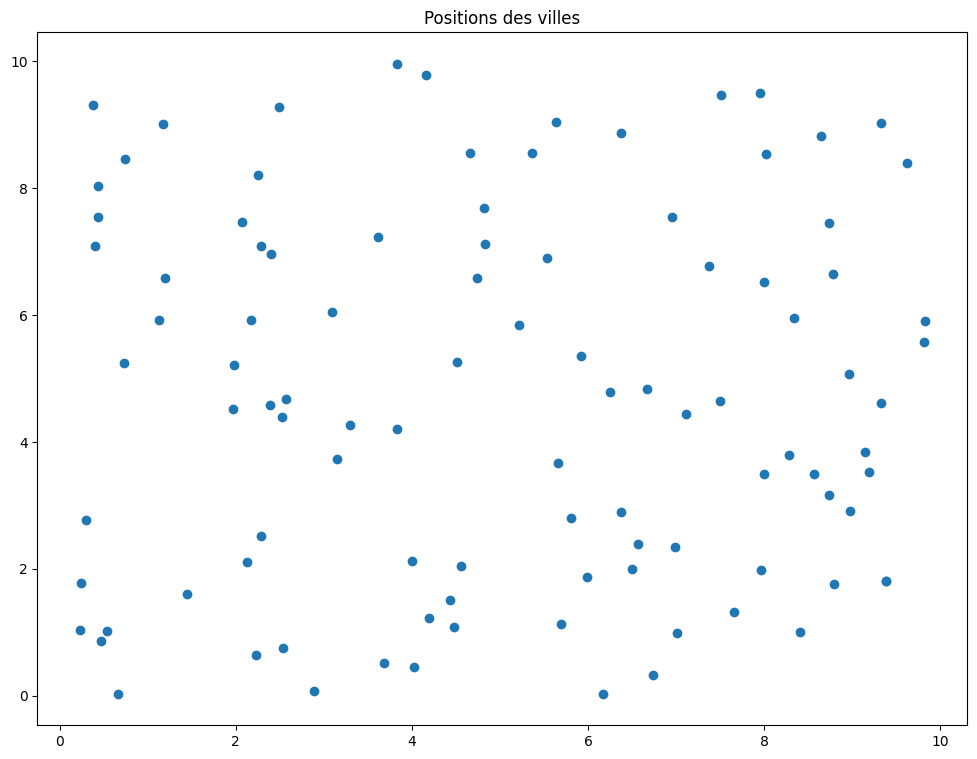

In [4]:
pyplot.scatter(parcours.xs(), parcours.ys())
pyplot.title('Positions des villes')
pyplot.show()

## Premier parcours aléatoire

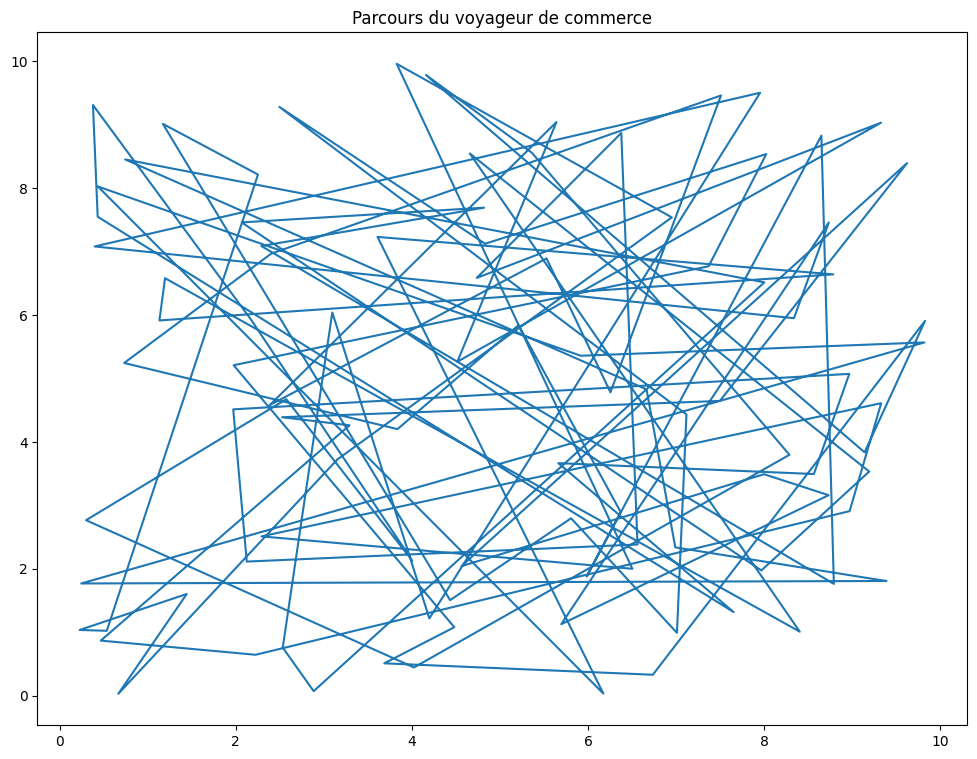

Le voyageur a parcouru 467 km.


In [5]:
pyplot.plot(parcours.xs(), parcours.ys())
pyplot.title('Parcours du voyageur de commerce')
pyplot.show()

print("Le voyageur a parcouru {:.0f} km.".format(parcours.distance()))

## Algorithme d'optimisation

### Algo de base

In [6]:
N = 1000
NBR = len(parcours.positions)
i = 0
T = 1e-4

while i < N:    
    
    # Calcul distance
    distance = parcours.distance()
    
    # Selection des 2 villes à échanger
    idx1 = rand.randint(0, NBR-1)
    idx2 = rand.randint(0, NBR-1)
    
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1
    
    # Echange des deux villes dans le parcours
    newParcours = Parcours(parcours.positions[0:idx1] + parcours.positions[idx1:idx2+1][::-1] + parcours.positions[idx2+1:])
    
    # Calcul nouvelle distance
    newDistance = newParcours.distance()
    
    # On accepte le changement si la nouvelle distance est plus petite que la precedente,
    # sinon on l'accepte avec une certaine probabilite
    if newDistance <= distance:
        
        parcours = newParcours
        
    else:
        
        alea = rand.random()        
        
        if(alea < T):
            
            parcours = newParcours
    
    i += 1

### Avec contrainte convergence

In [7]:
N = 1000
NBR = len(parcours.positions)
i = 0

while i < N:
    
    # Facteur de temperature
    T = math.log( N - i ) / NBR * 0.0001; # converge mechament bien avec ce parametre
    
    # Calcul distance
    distance = parcours.distance()
    
    # Selection des 2 villes à échanger
    idx1 = rand.randint(0, NBR-1)
    idx2 = rand.randint(0, NBR-1)
    
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1
    
    # Echange des deux villes dans le parcours
    newParcours = Parcours(parcours.positions[0:idx1] + parcours.positions[idx1:idx2+1][::-1] + parcours.positions[idx2+1:])
    
    # Calcul nouvelle distance
    newDistance = newParcours.distance()
    
    # On accepte le changement si la nouvelle distance est plus petite que la precedente,
    # sinon on l'accepte avec une certaine probabilite
    if newDistance <= distance:
        
        parcours = newParcours
        
    else:
        
        alea = rand.random()
        proba = math.exp(T * newDistance / (distance - newDistance))
        
        if(alea > proba):
            
            parcours = newParcours
    
    i += 1

## Résultat

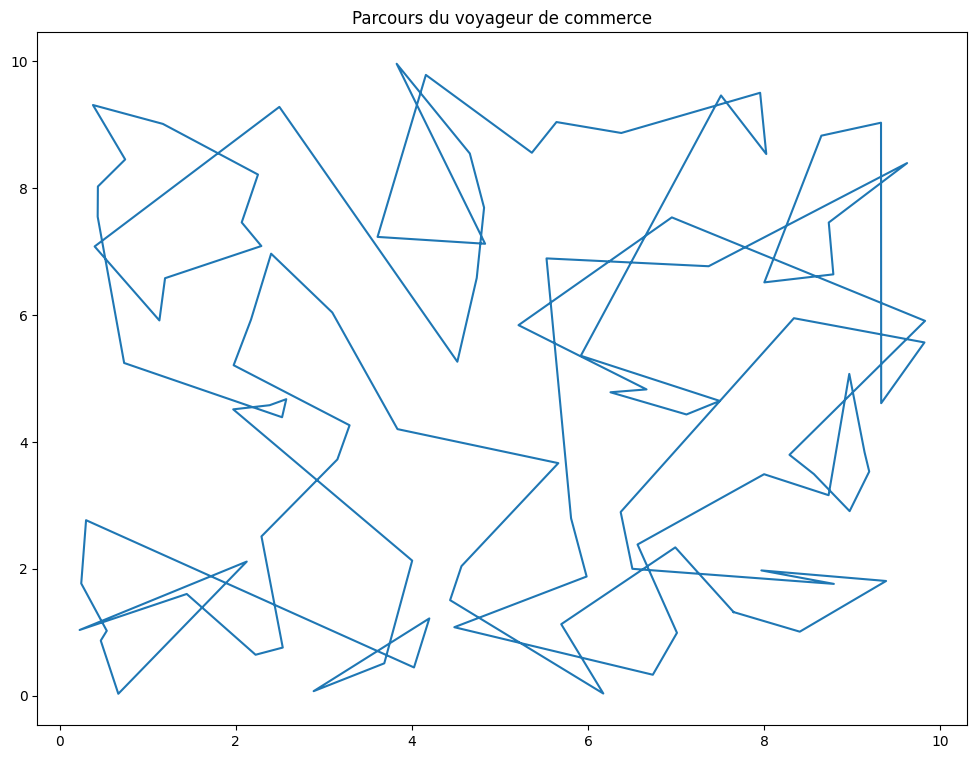

Le voyageur a parcouru 150 km.


In [8]:
pyplot.plot(parcours.xs(), parcours.ys())
pyplot.title('Parcours du voyageur de commerce')
pyplot.show()

print("Le voyageur a parcouru {:.0f} km.".format(parcours.distance()))